<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 1

### Median Value of owner occupied homes

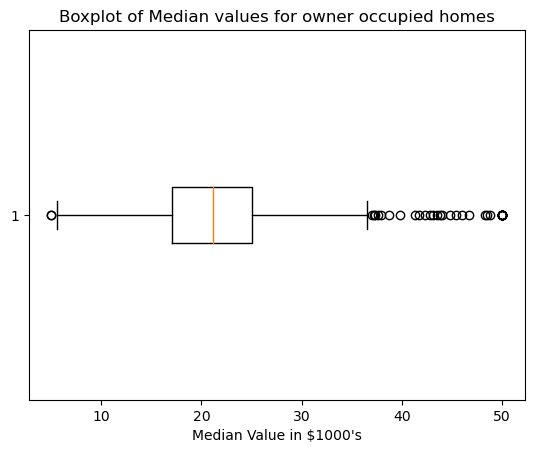

In [9]:
plt.boxplot(x="MEDV", data=boston_df,vert=False)
plt.title("Boxplot of Median values for owner occupied homes")
plt.xlabel("Median Value in $1000's")
plt.show()


### Are the Houses bounded by the charles river

Text(0.5, 1.0, 'Are the Houses bounded by the charles river or not')

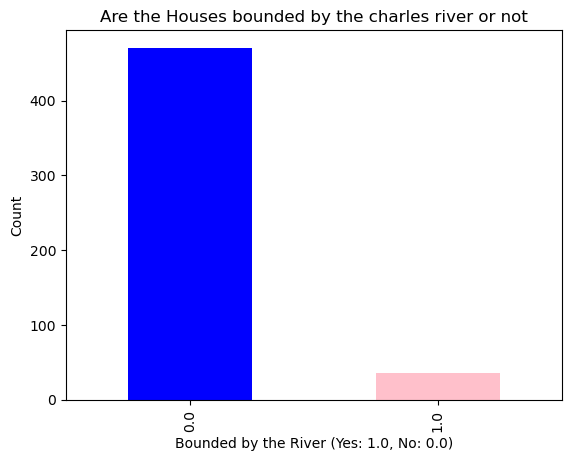

In [18]:
count = boston_df['CHAS'].value_counts()
count.plot(kind='bar',color = ['blue','pink'])
plt.xlabel('Bounded by the River (Yes: 1.0, No: 0.0)')
plt.ylabel('Count')
plt.title('Are the Houses bounded by the charles river or not')

### Boxplot for the MEDV variable vs the AGE variable

<Figure size 1400x800 with 0 Axes>

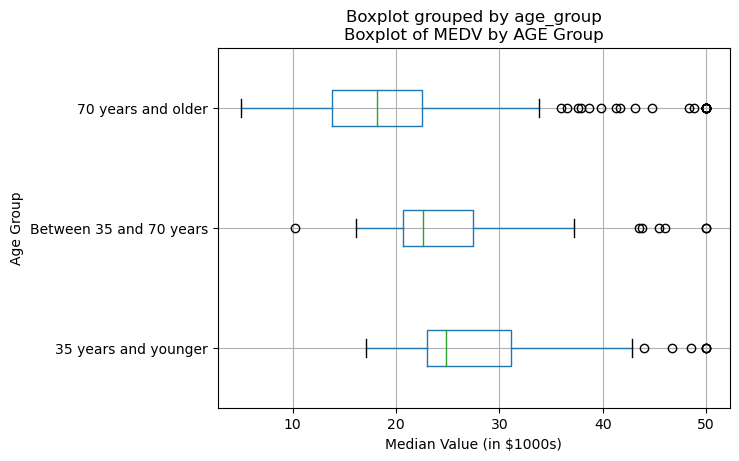

In [25]:
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

# Create the boxplot
plt.figure(figsize=(14, 8))
boston_df.boxplot(column='MEDV', by='age_group', vert=False)
plt.title('Boxplot of MEDV by AGE Group')
plt.xlabel('Median Value (in $1000s)')
plt.ylabel('Age Group')
plt.show()

### Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

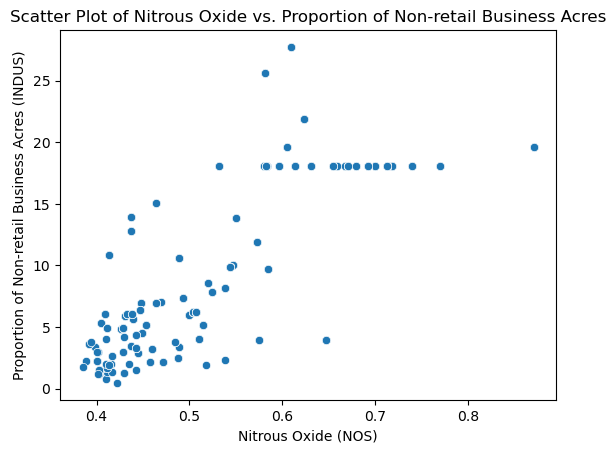

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
plt.xlabel("Nitrous Oxide (NOS)")
plt.ylabel("Proportion of Non-retail Business Acres (INDUS)")
plt.title("Scatter Plot of Nitrous Oxide vs. Proportion of Non-retail Business Acres")
plt.show()


#### As the Proportion of Non-Retail business Acres increases, the nitrous oxide concentration also increases

### Histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

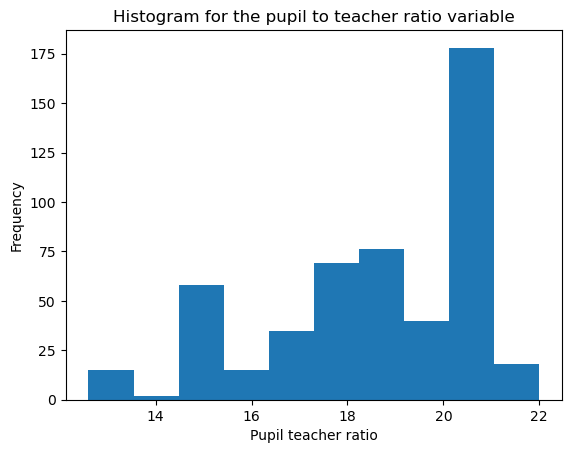

In [33]:
plt.hist(boston_df['PTRATIO'])
plt.xlabel('Pupil teacher ratio')
plt.ylabel('Frequency')
plt.title('Histogram for the pupil to teacher ratio variable')

## Task 2

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [34]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

#### P-value<0.05 .Reject the null hypothesis.There is a significant difference in the median value of houses bounded by the Charles river

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [37]:
model = ols('MEDV ~ C(age_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq     df         F        PR(>F)
C(age_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


#### The results show a significant difference in  Median values of houses for each proportion of owner occupied units built prior to 1940.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)



In [38]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

#### p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and Proportion of Non-retail Business Acres per town .

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [39]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        00:31:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""